## Sign Language Recognition
### Big Project Notebook
#### Name - Student ID

### Table of Contents 
* Directory Initialization 
* Dataset/Dataloader Splits
* GCN Model Training
* Accuracy and Loss plots 
* Evaluation
* Loading a trained model

#### Directory Initializations

In [37]:
import os
import torch
direc = '/home/jovyan/Documents/DL/DL_Project/WLASL'
subset = 'asl100'
split_file = os.path.join(direc, 'data/splits/{}.json'.format(subset))
pose_data = os.path.join(direc, 'data/pose_per_individual_videos')

In [38]:
from configs import Config
config_file = os.path.join(direc, 'sign-language-recognition/{}.ini'.format(subset))
configs = Config(config_file)
 
epochs = configs.max_epochs
log_interval = configs.log_interval
num_samples = configs.num_samples
hidden_size = configs.hidden_size
drop_p = configs.drop_p
num_stages = configs.num_stages

#### Dataset Distribution

In [21]:
from dataloader import Sign_Dataset

train_dataset = Sign_Dataset(file_name_index=split_file, split=['train', 'val'], pose_directory=pose_data, img_transforms=None, video_transforms=None, num_samples=num_samples)

train_data_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=configs.batch_size,
                                                    shuffle=True)

val_dataset = Sign_Dataset(file_name_index=split_file, split='test', pose_directory=pose_data,
                               img_transforms=None, video_transforms=None,
                               num_samples=num_samples, sampling_method='k_copies')
    
val_data_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=configs.batch_size,
                                                  shuffle=True)

In [30]:
print("Dataloader split for training: {}".format(len(train_dataset)))
print("Dataloader split for testing {}".format(len(val_dataset)))


Dataloader split for training: 1780
Dataloader split for testing 258


In [24]:
import json
with open(split_file, 'r') as f:
    content = json.load(f)

        # create label encoder
labels = sorted([label_entry['gloss'] for label_entry in content])

In [28]:
print("Number of classes: {}\n".format(len(labels)))
print(labels)

Number of classes: 100

['accident', 'africa', 'all', 'apple', 'basketball', 'bed', 'before', 'bird', 'birthday', 'black', 'blue', 'book', 'bowling', 'brown', 'but', 'can', 'candy', 'chair', 'change', 'cheat', 'city', 'clothes', 'color', 'computer', 'cook', 'cool', 'corn', 'cousin', 'cow', 'dance', 'dark', 'deaf', 'decide', 'doctor', 'dog', 'drink', 'eat', 'enjoy', 'family', 'fine', 'finish', 'fish', 'forget', 'full', 'give', 'go', 'graduate', 'hat', 'hearing', 'help', 'hot', 'how', 'jacket', 'kiss', 'language', 'last', 'later', 'letter', 'like', 'man', 'many', 'medicine', 'meet', 'mother', 'need', 'no', 'now', 'orange', 'paint', 'paper', 'pink', 'pizza', 'play', 'pull', 'purple', 'right', 'same', 'school', 'secretary', 'shirt', 'short', 'son', 'study', 'table', 'tall', 'tell', 'thanksgiving', 'thin', 'thursday', 'time', 'walk', 'want', 'what', 'white', 'who', 'woman', 'work', 'wrong', 'year', 'yes']


#### GCN Model Training

In [31]:
!python3 ./train.py

Training now...Epoch[1/1]
Train Epoch: 1 [64/1780 (4%)]	Loss: 6.299788, Accu: 1.562500%
Train Epoch: 1 [128/1780 (7%)]	Loss: 6.111735, Accu: 0.000000%
Train Epoch: 1 [192/1780 (11%)]	Loss: 5.729658, Accu: 1.562500%
Train Epoch: 1 [256/1780 (14%)]	Loss: 5.667777, Accu: 1.562500%
Train Epoch: 1 [320/1780 (18%)]	Loss: 5.084188, Accu: 4.687500%
Train Epoch: 1 [384/1780 (21%)]	Loss: 5.336092, Accu: 3.125000%
Train Epoch: 1 [448/1780 (25%)]	Loss: 5.246172, Accu: 1.562500%
Train Epoch: 1 [512/1780 (29%)]	Loss: 4.953913, Accu: 0.000000%
Train Epoch: 1 [576/1780 (32%)]	Loss: 4.871378, Accu: 0.000000%
Train Epoch: 1 [640/1780 (36%)]	Loss: 4.765397, Accu: 3.125000%
Train Epoch: 1 [704/1780 (39%)]	Loss: 4.924930, Accu: 0.000000%
Train Epoch: 1 [768/1780 (43%)]	Loss: 4.721512, Accu: 1.562500%
Train Epoch: 1 [832/1780 (46%)]	Loss: 4.762659, Accu: 1.562500%
Train Epoch: 1 [896/1780 (50%)]	Loss: 4.845535, Accu: 0.000000%
Train Epoch: 1 [960/1780 (54%)]	Loss: 4.768171, Accu: 1.562500%
Train Epoch: 1 [1

#### Accuracy and Loss Plots

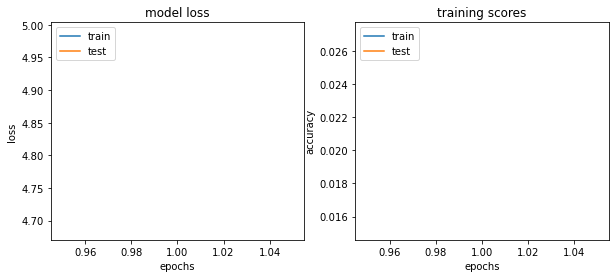

In [32]:
from utils import plot_curves
plot_curves()

#### Results and Evaluation

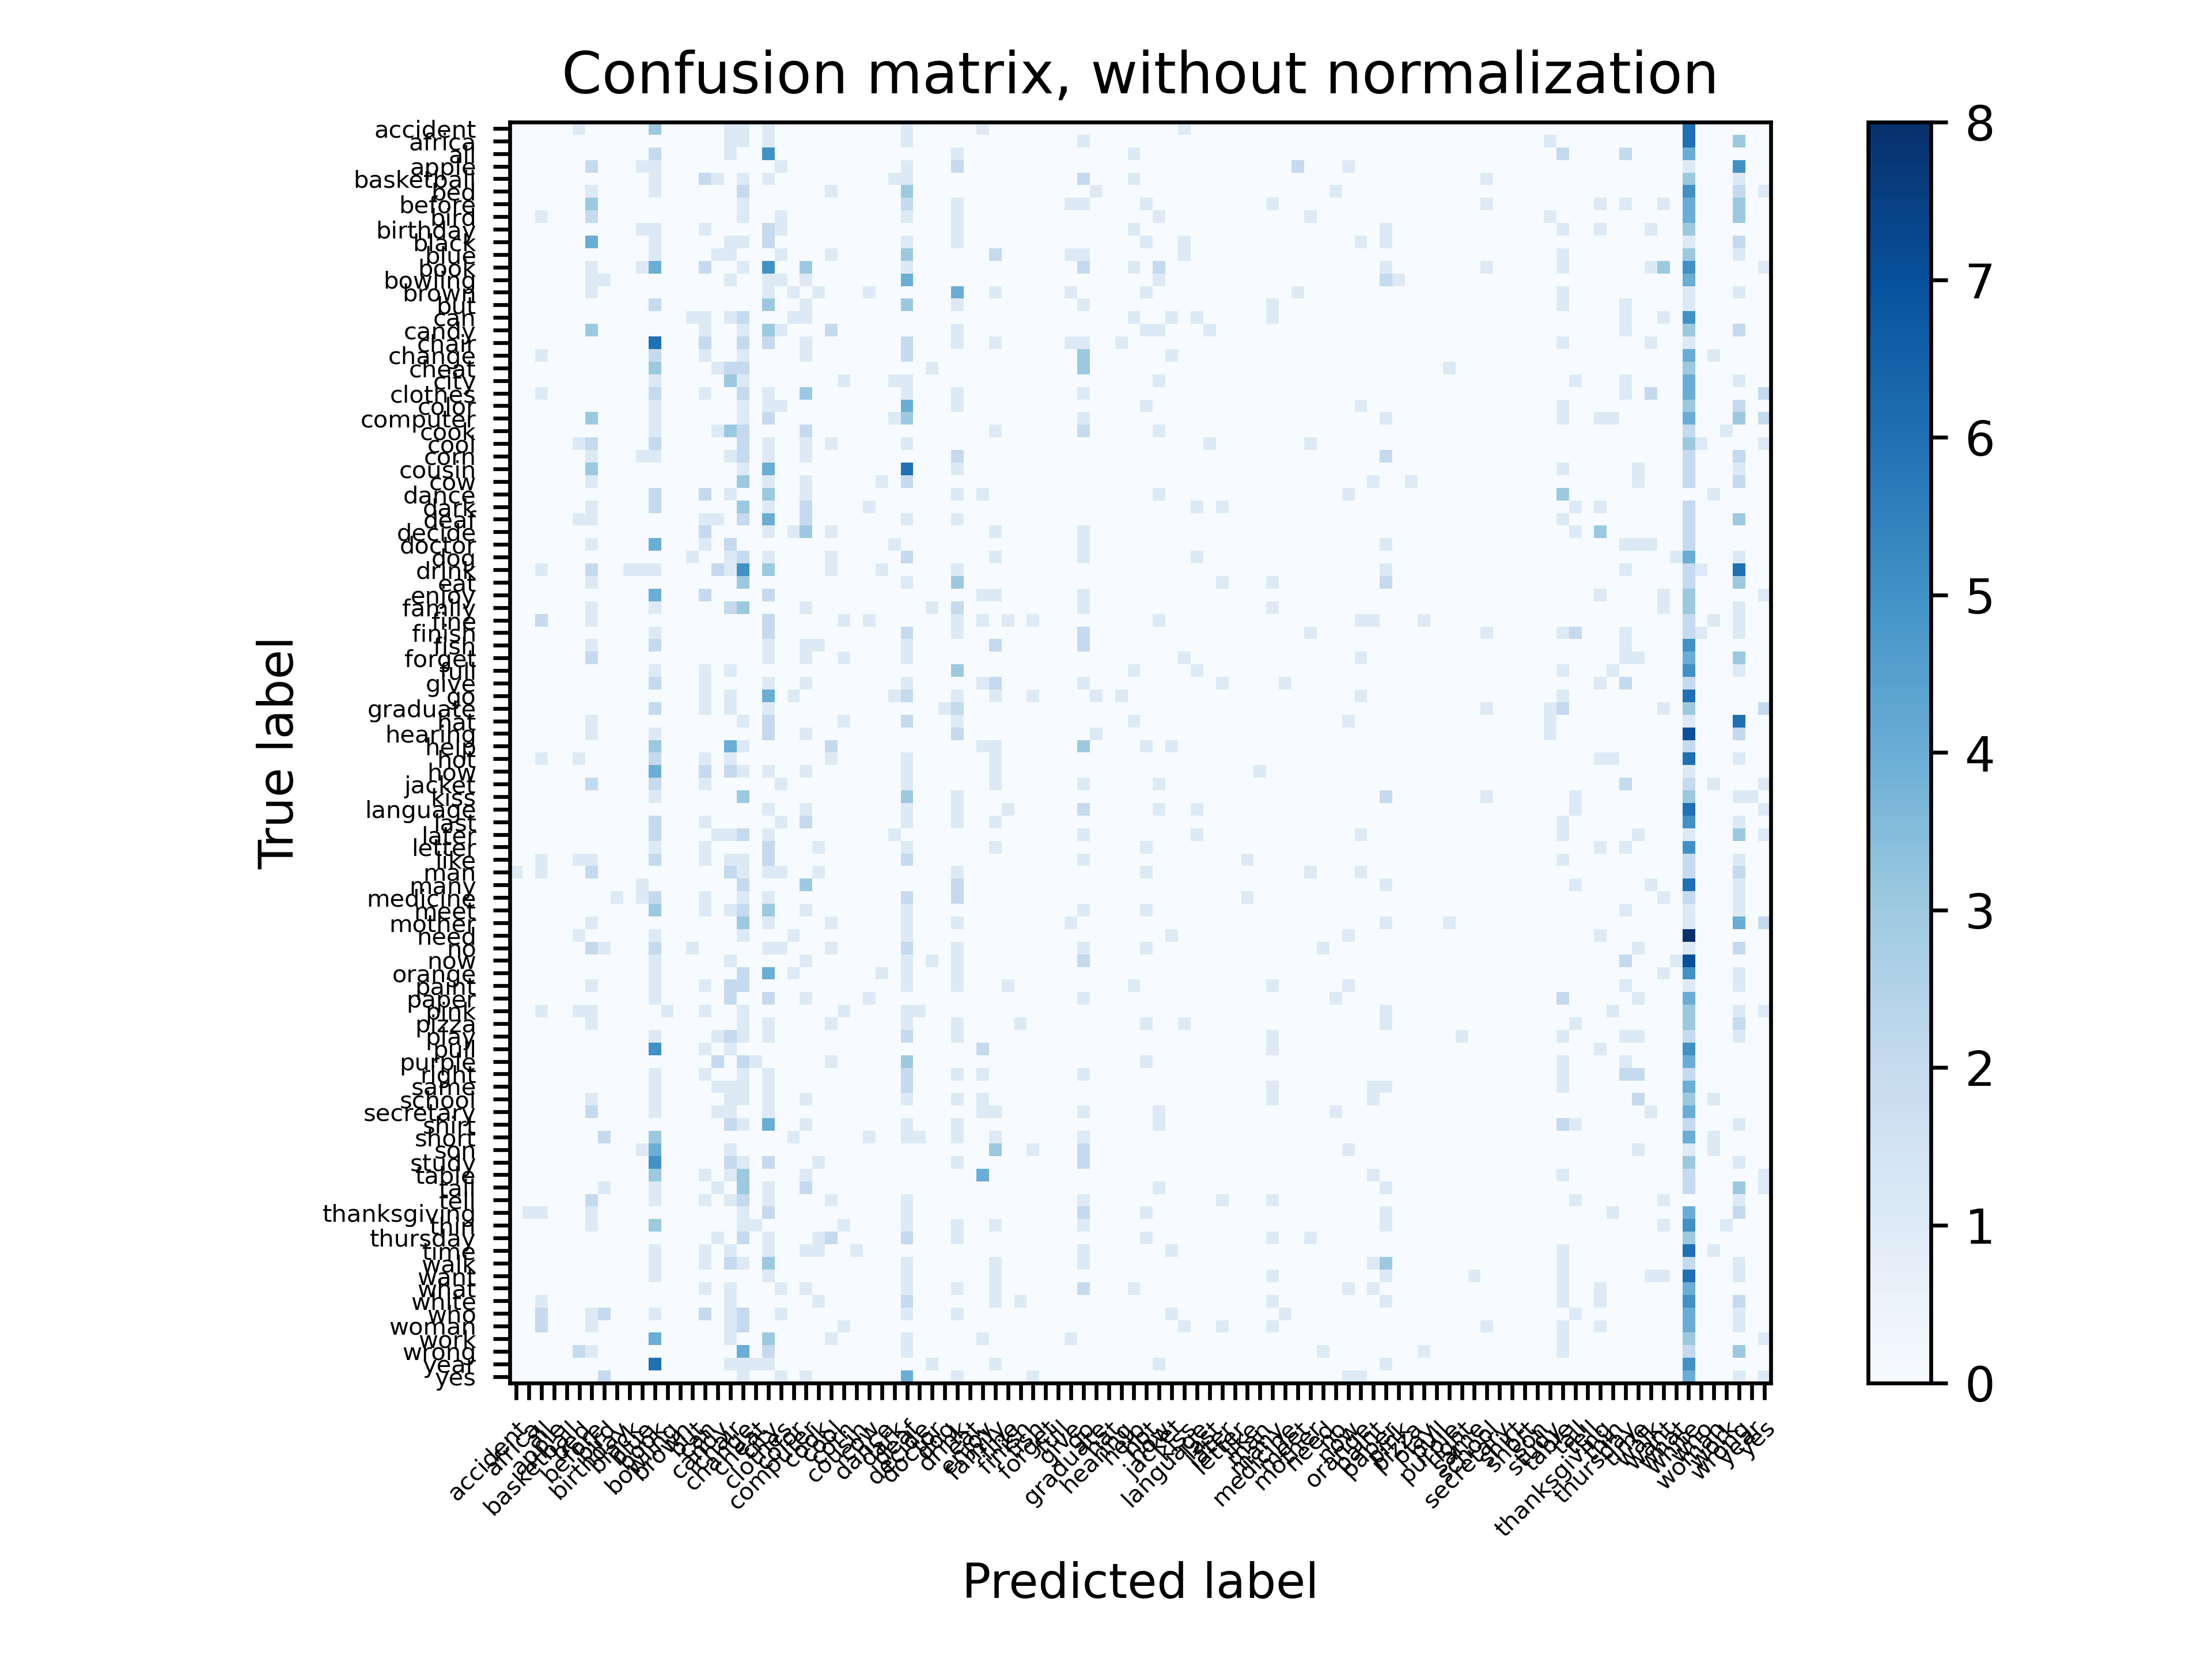

In [36]:
from IPython.display import Image
Image(filename='output/train-conf-mat.png', width=500, height=500) 

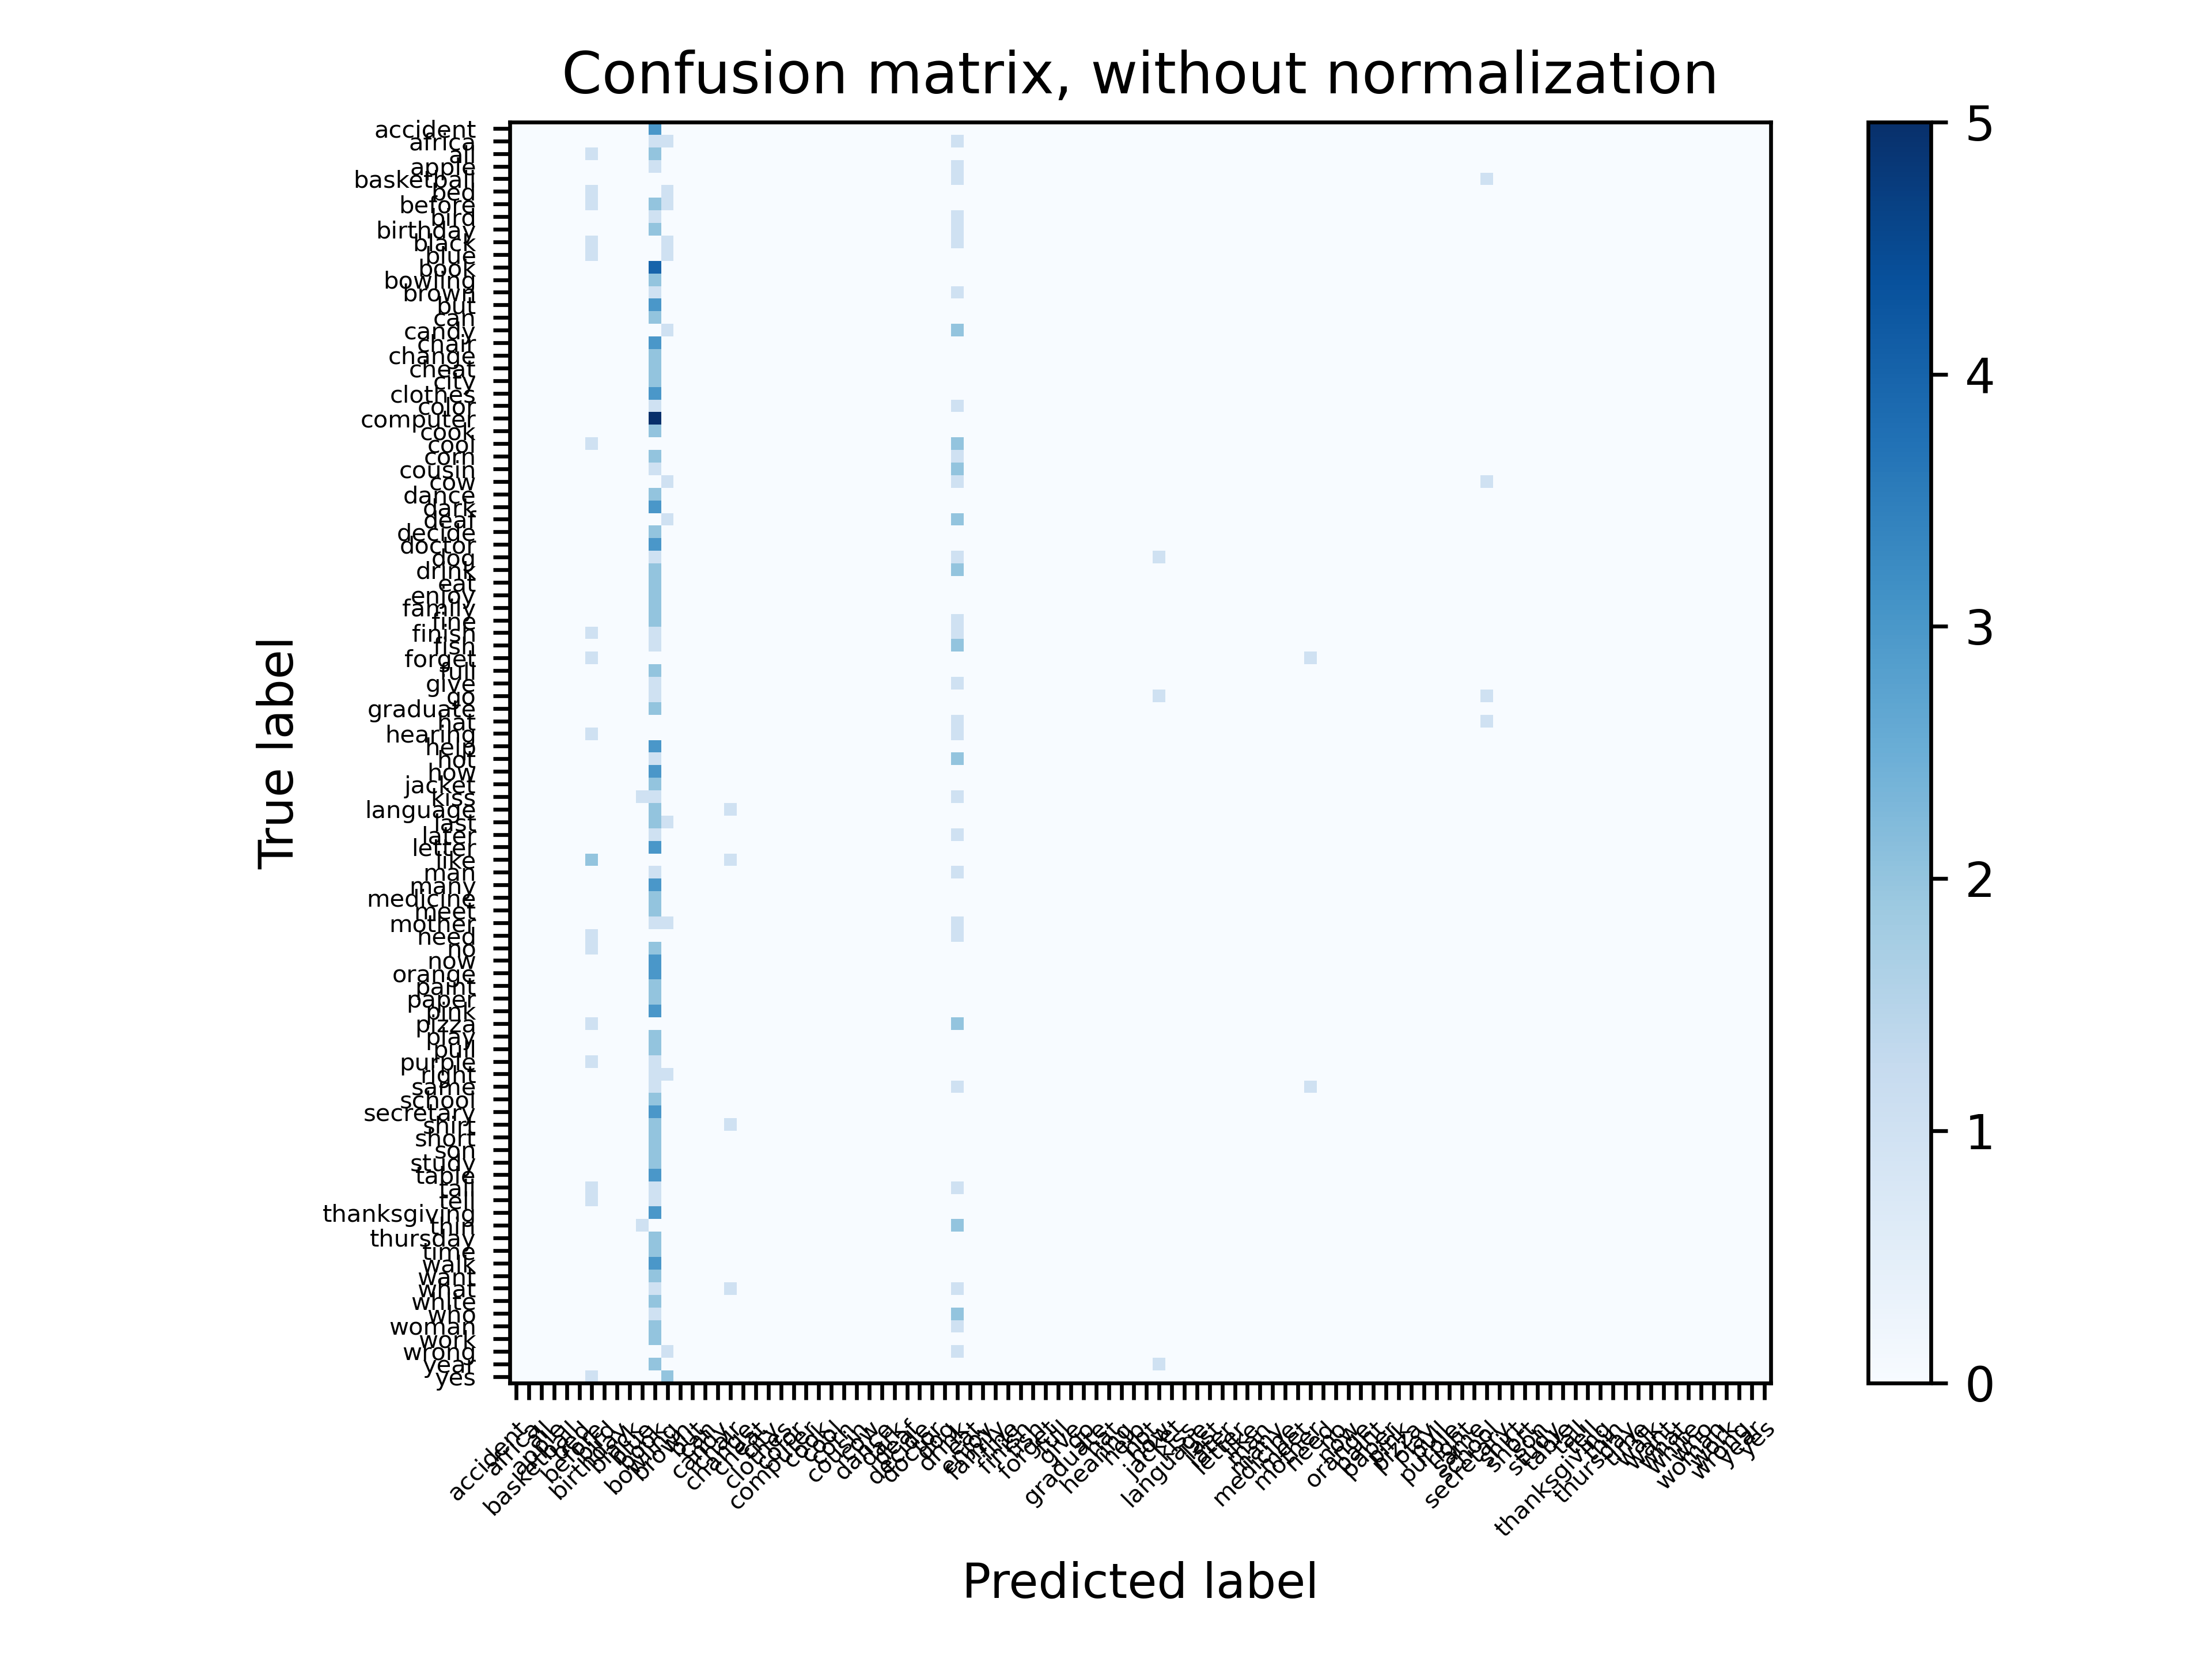

In [39]:
Image(filename='output/val-conf-mat.png', width=500, height=500) 

#### Load a Trained Model